ライブラリのインポート

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

%matplotlib inline

データの読み込み

In [3]:
df_train = pd.read_csv("data/input/train.csv")
df_test = pd.read_csv("data/input/test.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# データの前処理

In [10]:
df_train.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [11]:
# ["SalePrice"]の確認：describe
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\ut122\AppData\Local\Temp\ipykernel_19520\3594087639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

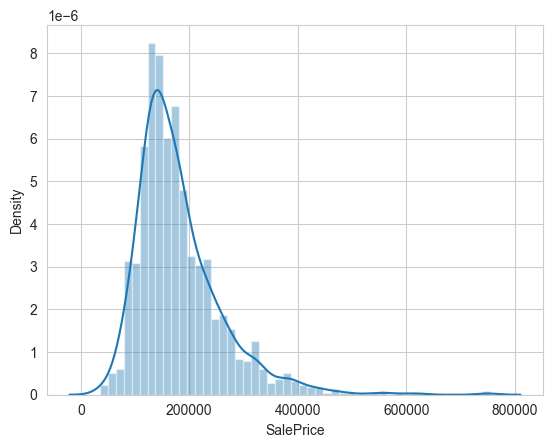

In [13]:
sns.distplot(df_train["SalePrice"])

In [14]:
# 尤度と歪度
print(f"歪度:{df_train['SalePrice'].skew()}")
print(f"尤度:{df_train['SalePrice'].kurt()}")

歪度:1.8828757597682129
尤度:6.536281860064529


# 数値型と小数点型のみのデータでヒートマップを作成

In [15]:
# データの結合
connection_df = pd.concat((df_train, df_test))
connection_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [16]:
connection_df_int = connection_df.select_dtypes(include=["int64", "float64"])

In [17]:
connection_df_str = connection_df.select_dtypes(include=["object"])

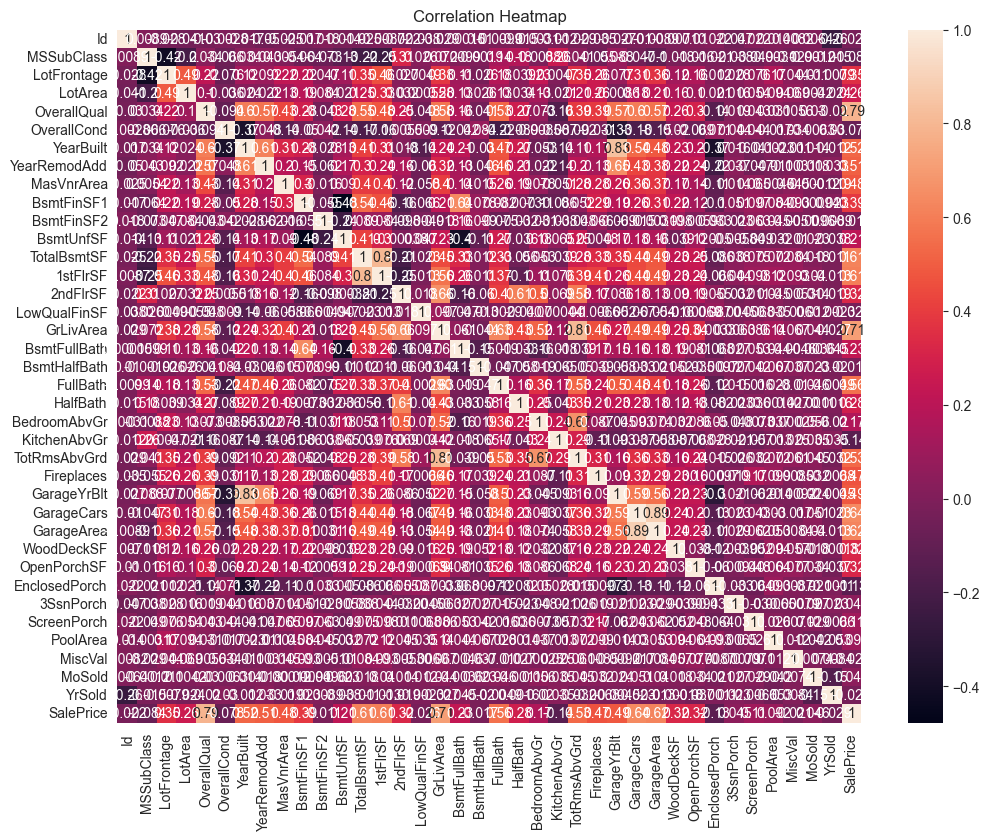

In [25]:
# ヒートマップ
plt.figure(figsize=(12,9))
sns.heatmap(connection_df.select_dtypes(include=[np.number, bool]).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [27]:
# SalesPriceとの相関の強さ（相関係数）を降順にソート
corr = connection_df.select_dtypes(include=[np.number, bool]).corr()
corr.sort_values("SalePrice", ascending=False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
GrLivArea,-0.029046,0.071677,0.382462,0.284519,0.575126,-0.116569,0.242666,0.316972,0.402994,0.211669,...,0.251017,0.341907,0.003274,0.006268,0.086284,0.135441,0.067118,0.044198,-0.026919,0.708624
GarageCars,-0.010208,-0.046597,0.310587,0.180434,0.600744,-0.181787,0.538074,0.426022,0.361190,0.255482,...,0.240715,0.203544,-0.132846,0.023383,0.043112,0.030424,-0.016934,0.050882,-0.022918,0.640409
GarageArea,-0.008865,-0.103394,0.359786,0.213251,0.565122,-0.154149,0.480735,0.376765,0.374061,0.310449,...,0.238075,0.232559,-0.106417,0.029440,0.062389,0.053049,0.008446,0.040335,-0.013451,0.623431
TotalBsmtSF,-0.024924,-0.219965,0.354822,0.254138,0.549294,-0.174002,0.408515,0.298107,0.397240,0.536467,...,0.229600,0.245521,-0.085510,0.037892,0.075363,0.072216,0.084002,0.017888,-0.011184,0.613581
1stFlrSF,-0.008678,-0.248641,0.458247,0.332460,0.479152,-0.157418,0.310814,0.242245,0.395834,0.458092,...,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062,0.040143,-0.013442,0.605852
FullBath,-0.009946,0.139140,0.181668,0.125826,0.528483,-0.215504,0.471169,0.457980,0.259777,0.081525,...,0.181266,0.260423,-0.118983,0.015192,-0.015910,0.028091,-0.010024,0.046274,-0.004882,0.560664
TotRmsAbvGrd,-0.029368,0.040509,0.349513,0.213802,0.389761,-0.092027,0.114280,0.198250,0.278228,0.052141,...,0.156543,0.238156,0.015345,-0.025764,0.032324,0.072061,0.060903,0.045137,-0.032354,0.533723
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897


In [22]:
connection_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [6]:
connection_df.isnull().sum()

# 文字型の欠損値処理

In [7]:
# object型の欠損値処理
connection_df["PoolQC"] = connection_df["PoolQC"].fillna("None")
connection_df["MiscFeature"] = connection_df["MiscFeature"].fillna("None")
connection_df["Alley"] = connection_df["Alley"].fillna("None")
connection_df["Fence"] = connection_df["Fence"].fillna("None")
connection_df["FireplaceQu"] = connection_df["FireplaceQu"].fillna("None")

In [8]:
for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    connection_df[col] = connection_df[col].fillna("None")

In [9]:
for col in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
    connection_df[col] = connection_df[col].fillna("None")

In [10]:
connection_df["MasVnrType"] = connection_df["MasVnrType"].fillna("None")

In [11]:
connection_df.isnull().sum()

# 数値型の欠損値処理

In [12]:
for col in ("BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath", "TotalBsmtSF"):
    connection_df[col] = connection_df[col].fillna(0)

In [13]:
connection_df["MasVnrArea"] = connection_df["MasVnrArea"].fillna(0)
connection_df["GarageYrBlt"] = connection_df["GarageYrBlt"].fillna(0)

In [14]:
for col in ("GarageCars", "GarageArea"):
    connection_df[col] = connection_df[col].fillna(0)

In [15]:
connection_df.isnull().sum()

# 欠損値自体に意味のない文字型を最頻値で補完

In [16]:
connection_df["MSZoning"].value_counts()

In [17]:
connection_df["MSZoning"] = connection_df["MSZoning"].fillna(connection_df["MSZoning"].mode()[0])

In [18]:
connection_df["Functional"].value_counts()

In [19]:
connection_df["Functional"] = connection_df["Functional"].fillna("Typ")

In [20]:
connection_df["Electrical"] = connection_df["Electrical"].fillna(connection_df["Electrical"].mode()[0])
connection_df["KitchenQual"] = connection_df["KitchenQual"].fillna(connection_df["KitchenQual"].mode()[0])
connection_df["Exterior1st"] = connection_df["Exterior1st"].fillna(connection_df["Exterior1st"].mode()[0])
connection_df["Exterior2nd"] = connection_df["Exterior2nd"].fillna(connection_df["Exterior2nd"].mode()[0])
connection_df["SaleType"] = connection_df["SaleType"].fillna(connection_df["SaleType"].mode()[0])

In [21]:
connection_df["Utilities"].value_counts()

In [22]:
connection_df = connection_df.drop(["Utilities"], axis=1)

In [24]:
connection_df["LotFrontage"].value_counts()

In [25]:
connection_df["LotFrontage"] = connection_df["LotFrontage"].fillna(connection_df["LotFrontage"].mode()[0])

In [26]:
# 欠損値の有無確認
connection_df.isnull().sum()

In [27]:
connection_df

# エンコーディング

In [28]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    lbl = LabelEncoder()
    lbl.fit(list(connection_df[col].values))
    connection_df[col] = lbl.transform(list(connection_df[col].values))

In [29]:
connection_df[['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']].head(10)

In [30]:
connection_df = pd.get_dummies(connection_df, drop_first=True)

# 学習データの分割

In [31]:
# データの分割
train_df = connection_df[:len(df_train)]
test_df = connection_df[len(df_train):].drop(columns=['SalePrice'])

# X_trainには、SalePriceを除いたtrain_dfを代入
X_train = train_df.drop("SalePrice", axis=1)

# y_trainには、SalePriceのみが入ったtrain_dfを代入
y_train = train_df["SalePrice"]

# X_testにはtrain_dfを代入
X_test = test_df

print(X_train.shape, y_train.shape, X_test.shape)

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def run_cv(model):
    """
    
    :param model: 
    :return: 
    """
    cv = KFold(n_splits=3, random_state=42, shuffle=True)
    rmse_results = []
    models = []
    
    for trn_index, val_index in cv.split(X_train):
        X_trn, X_val = X_train.loc[trn_index], X_train.loc[val_index]
        y_trn, y_val = y_train[trn_index], y_train[val_index]
        
        # モデルの学習
        model.fit(X_trn, y_trn)
        pred = model.predict(X_val)
        
        # モデル制度の算出
        rmse = np.sqrt(mean_squared_error(y_val, pred))
        print("RMSE:", rmse)
        models.append(model)
    
    print(rmse_results)
    print("Average RMSE:", np.mean(rmse_results))
    return models

In [35]:
import lightgbm as lgb

lgb_params = {
    "objective":"regression",
    "metric": "rmse"
}

cv = KFold(n_splits=3, random_state=42, shuffle=True)
rmse_results = []
lgbm_models = []
# テストデータに対する予測結果を格納するための空の配列
test_preds = np.zeros(len(X_test))

for trn_index, val_index in cv.split(X_train, y_train):
    X_trn, X_val = X_train.loc[trn_index], X_train.loc[val_index]
    y_trn, y_val = y_train[trn_index], y_train[val_index]
    
    train_lgb = lgb.Dataset(X_trn, y_trn)
    validation_lgb = lgb.Dataset(X_val, y_val)
    model = lgb.train(
        lgb_params, train_lgb, 
        num_boost_round=1000, valid_sets=[train_lgb, validation_lgb], 

        )
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    print("RMSE:", rmse)
    rmse_results.append(rmse)
    lgbm_models.append(model)

    test_preds += model.predict(X_test) / cv.n_splits

print(rmse_results)
print("Average:", np.mean(rmse_results))

# データの提出

In [36]:
submission = pd.read_csv("sample_submission.csv")
submission["SalePrice"] = test_preds

# 提出ファイルの出力
submission.to_csv("submission.csv", index=False)